# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('kidney_disease.csv')

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.shape

(400, 26)

In [7]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df.rename(columns=col, inplace=True)
df

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'],errors='coerce')

# EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [12]:
# Categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [13]:
#Unique values of categorical columns
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n"+"="*60+"\n")

Unique values in column 'red_blood_cells':
[nan 'normal' 'abnormal']


Unique values in column 'pus_cell':
['normal' 'abnormal' nan]


Unique values in column 'pus_cell_clumps':
['notpresent' 'present' nan]


Unique values in column 'bacteria':
['notpresent' 'present' nan]


Unique values in column 'hypertension':
['yes' 'no' nan]


Unique values in column 'diabetes_mellitus':
['yes' 'no' ' yes' '\tno' '\tyes' nan]


Unique values in column 'coronary_artery_disease':
['no' 'yes' '\tno' nan]


Unique values in column 'appetite':
['good' 'poor' nan]


Unique values in column 'pedal_edema':
['no' 'yes' nan]


Unique values in column 'anemia':
['no' 'yes' nan]


Unique values in column 'class':
['ckd' 'ckd\t' 'notckd']




In [14]:
#replace weird values
df['diabetes_mellitus']=df['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease']=df['coronary_artery_disease'].replace('\tno','no')
df['class']=df['class'].replace('ckd\t','ckd' )

In [15]:
#Unique values of categorical columns
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n"+"="*60+"\n")

Unique values in column 'red_blood_cells':
[nan 'normal' 'abnormal']


Unique values in column 'pus_cell':
['normal' 'abnormal' nan]


Unique values in column 'pus_cell_clumps':
['notpresent' 'present' nan]


Unique values in column 'bacteria':
['notpresent' 'present' nan]


Unique values in column 'hypertension':
['yes' 'no' nan]


Unique values in column 'diabetes_mellitus':
['yes' 'no' nan]


Unique values in column 'coronary_artery_disease':
['no' 'yes' nan]


Unique values in column 'appetite':
['good' 'poor' nan]


Unique values in column 'pedal_edema':
['no' 'yes' nan]


Unique values in column 'anemia':
['no' 'yes' nan]


Unique values in column 'class':
['ckd' 'notckd']




<Figure size 800x500 with 0 Axes>

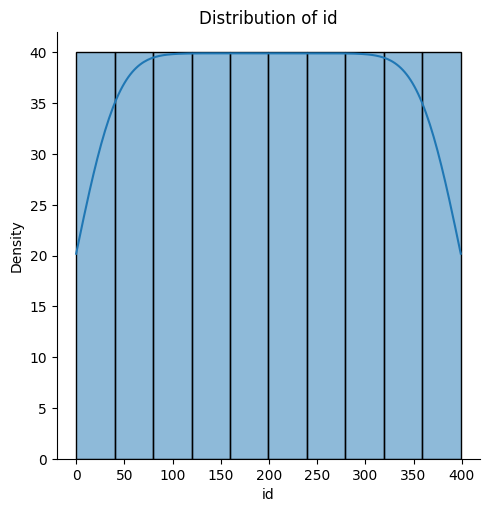

<Figure size 800x500 with 0 Axes>

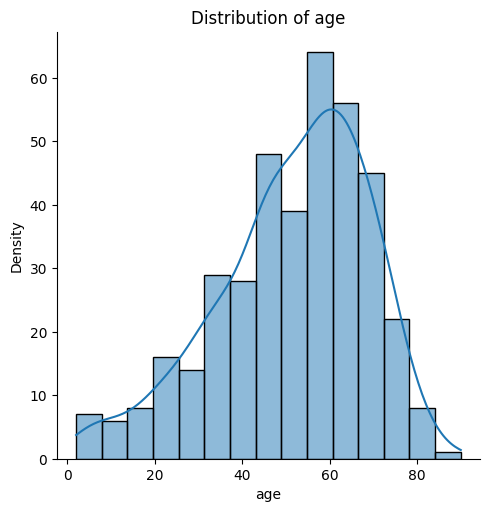

<Figure size 800x500 with 0 Axes>

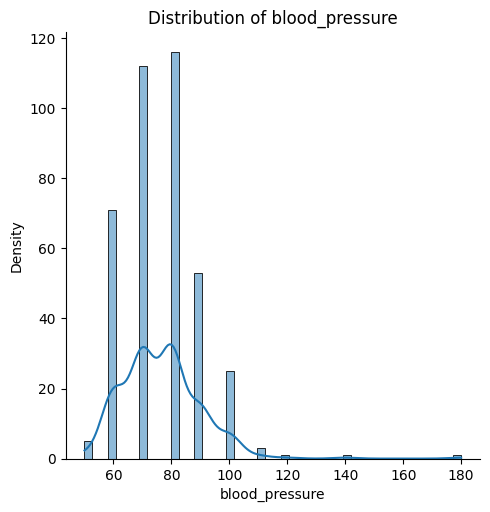

<Figure size 800x500 with 0 Axes>

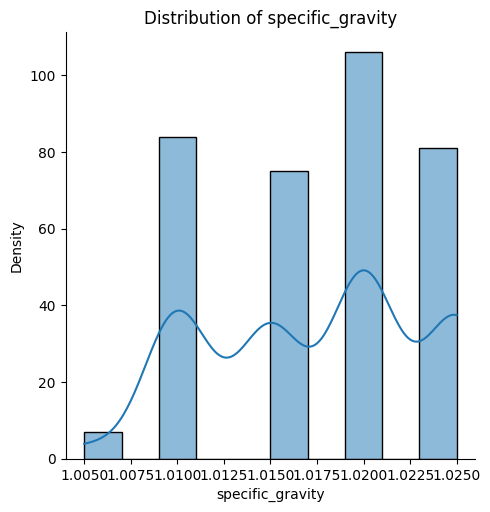

<Figure size 800x500 with 0 Axes>

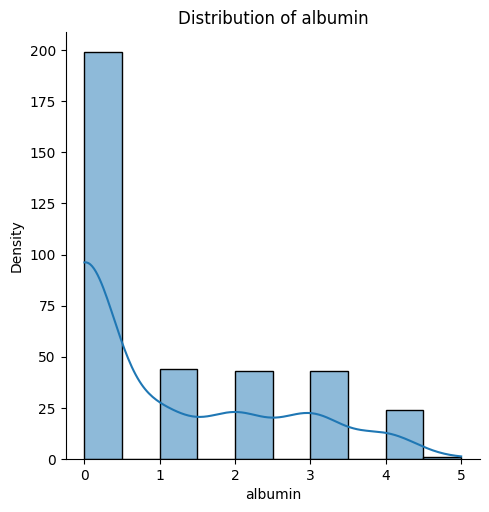

<Figure size 800x500 with 0 Axes>

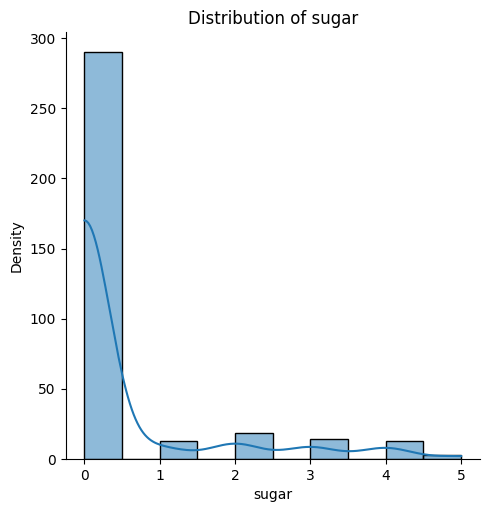

<Figure size 800x500 with 0 Axes>

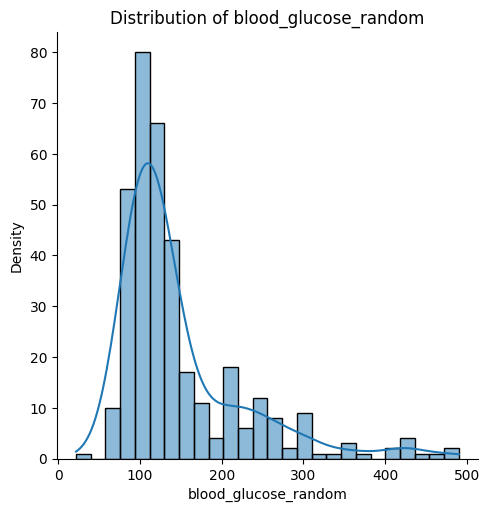

<Figure size 800x500 with 0 Axes>

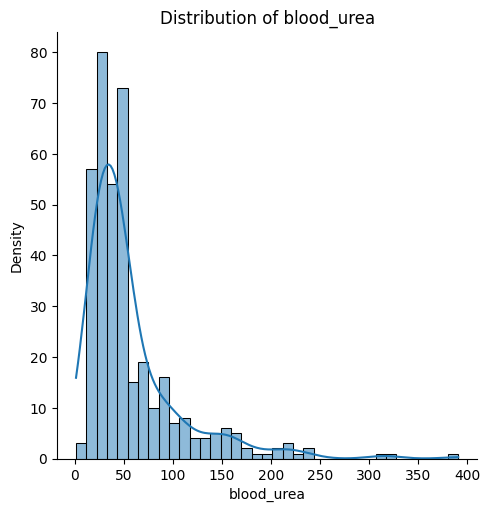

<Figure size 800x500 with 0 Axes>

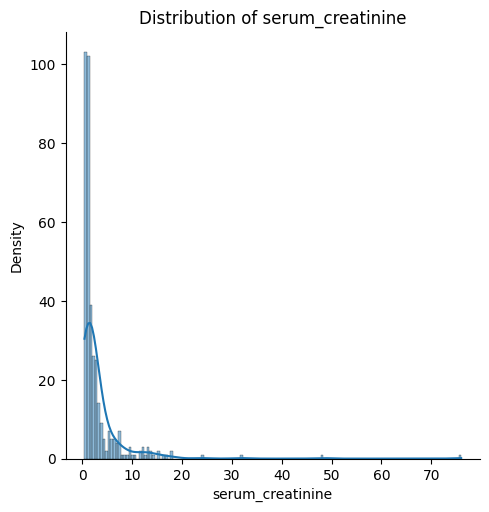

<Figure size 800x500 with 0 Axes>

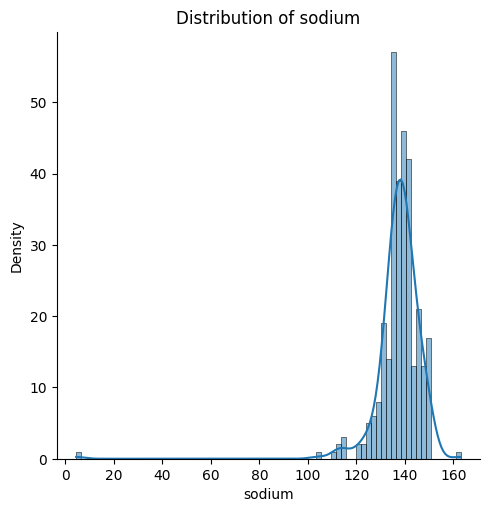

<Figure size 800x500 with 0 Axes>

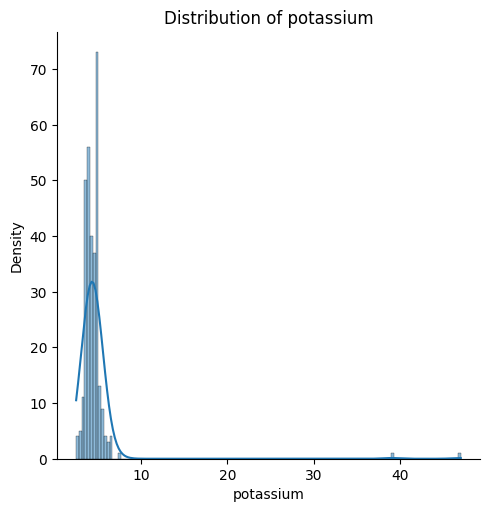

<Figure size 800x500 with 0 Axes>

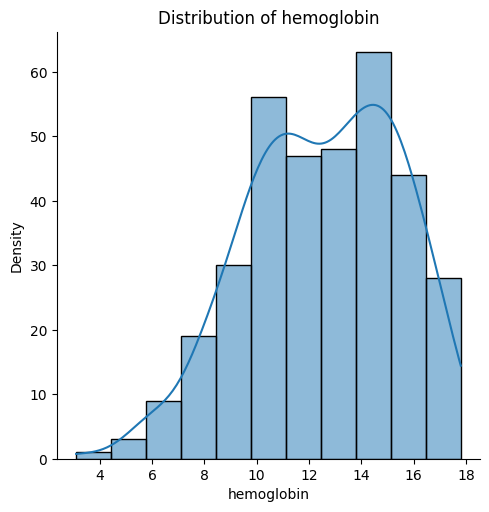

<Figure size 800x500 with 0 Axes>

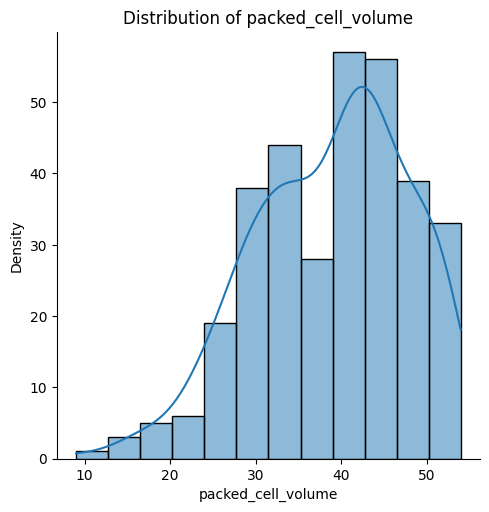

<Figure size 800x500 with 0 Axes>

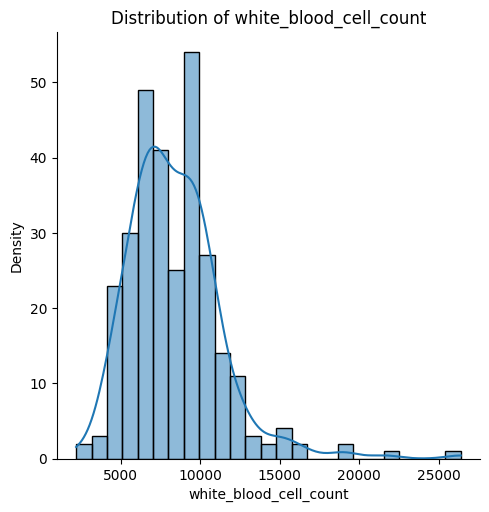

<Figure size 800x500 with 0 Axes>

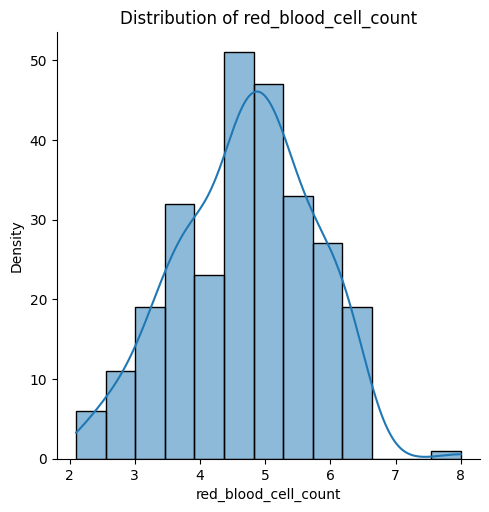

In [16]:
#plot displot for num_cols
for col in num_cols:
    plt.figure(figsize= (8,5))
    sns.displot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

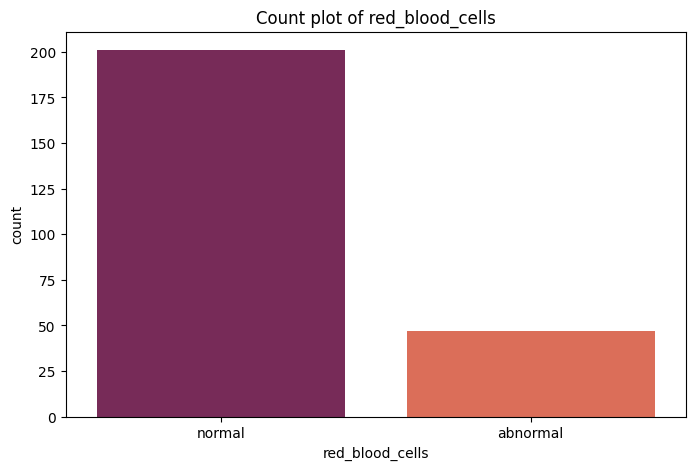

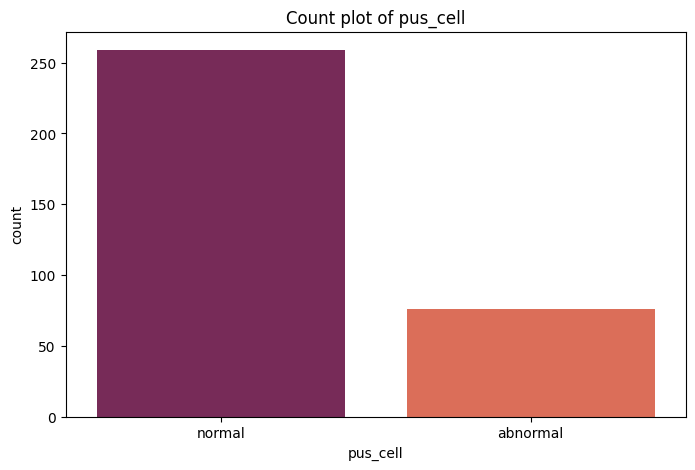

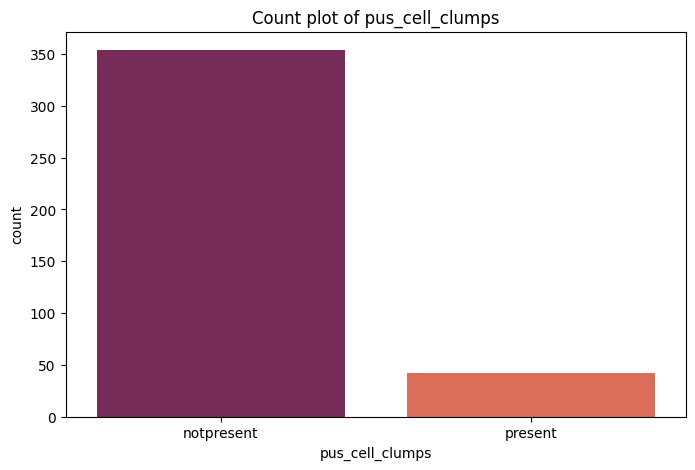

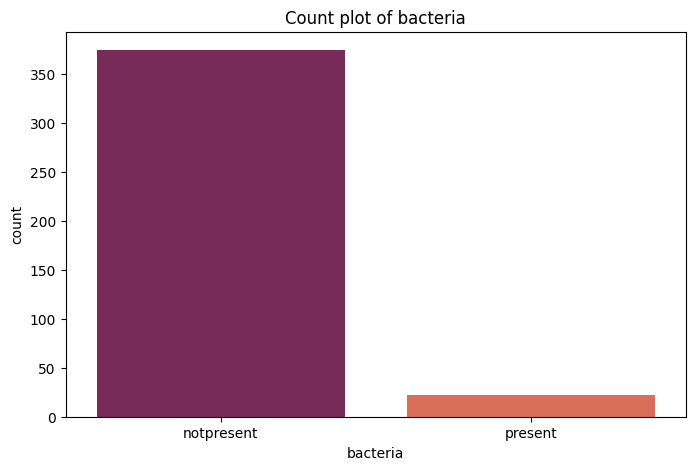

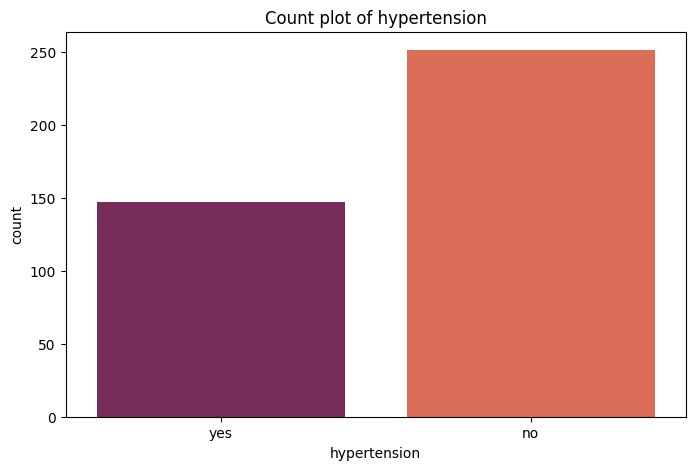

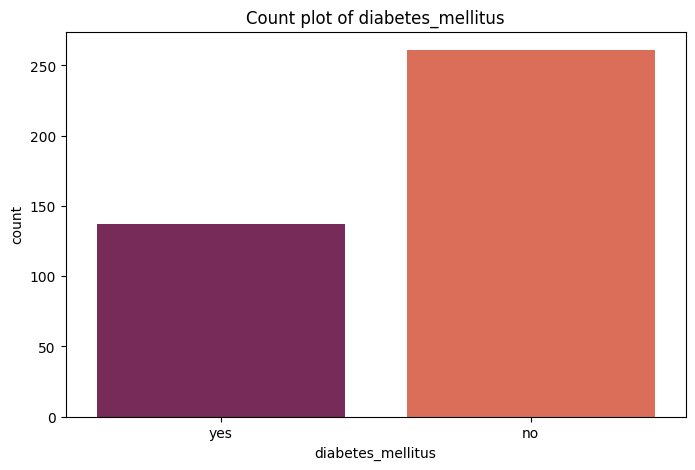

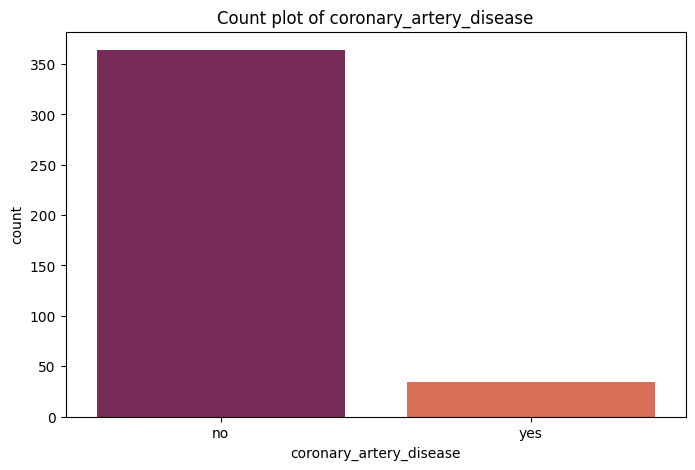

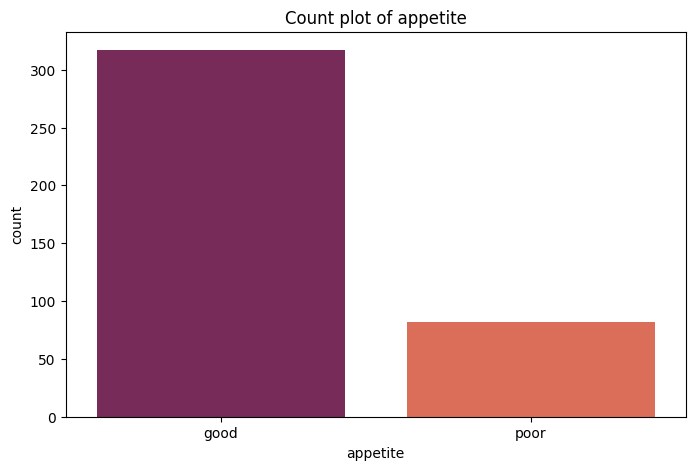

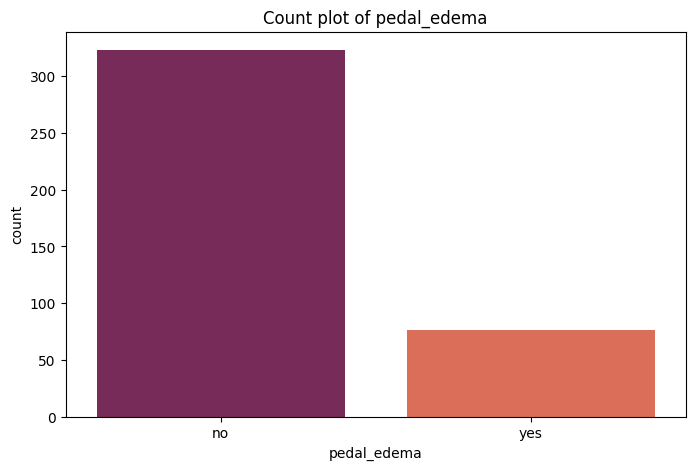

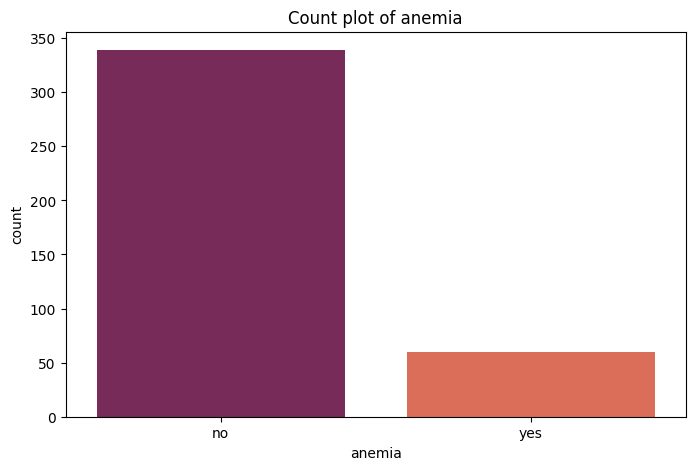

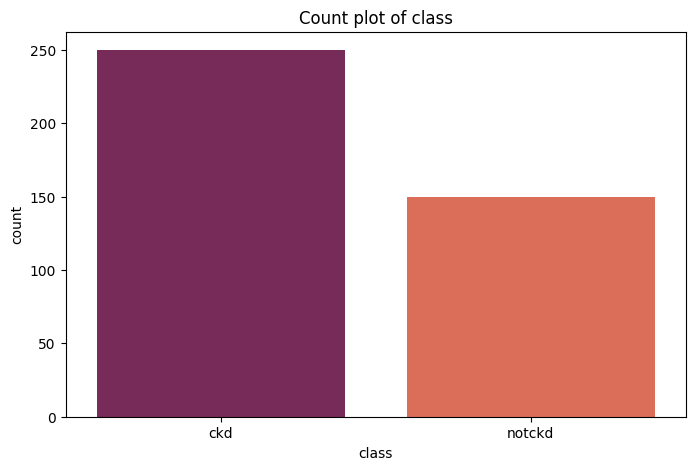

In [17]:
for col in cat_cols:
    plt.figure(figsize=(8,5))
    plt.title(f'Count plot of {col}')
    sns.countplot(x=df[col],palette='rocket')
    plt.xlabel(col)
    plt.show()

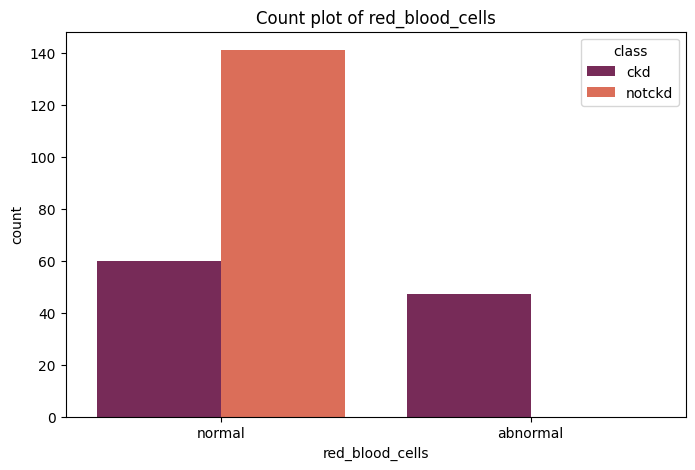

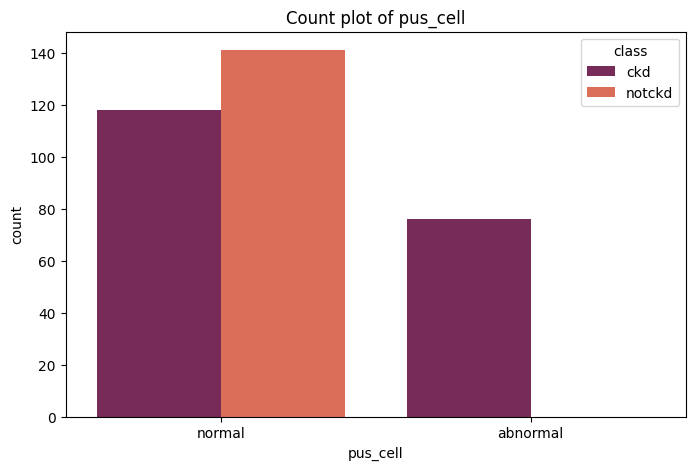

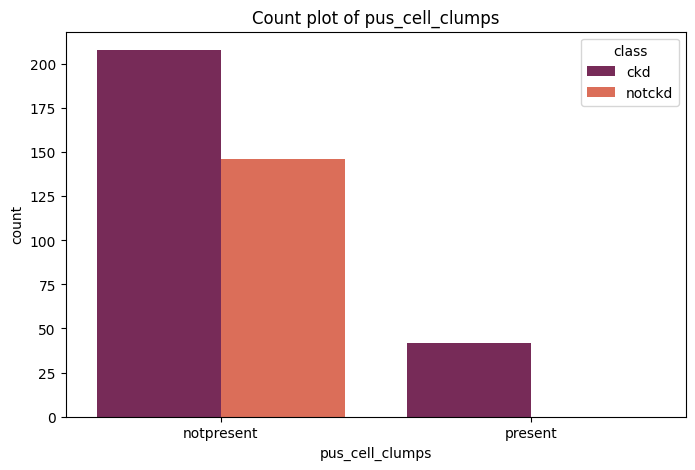

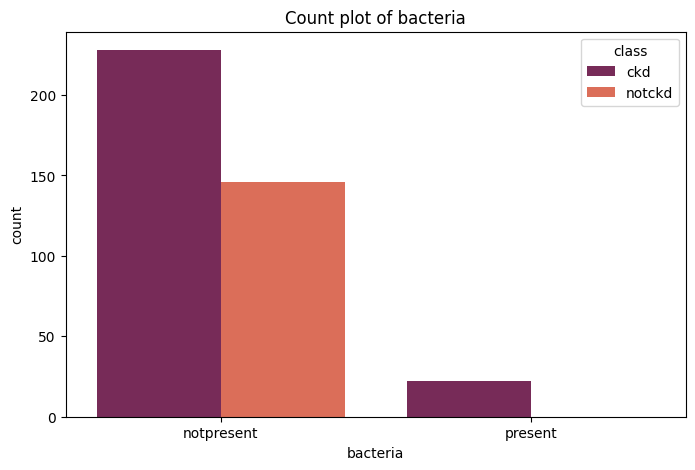

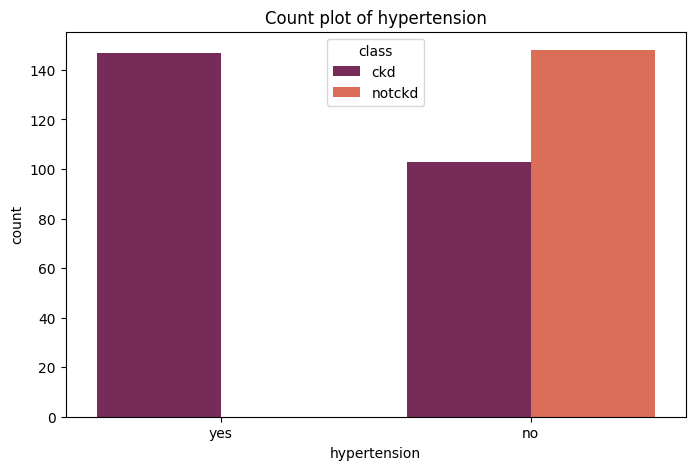

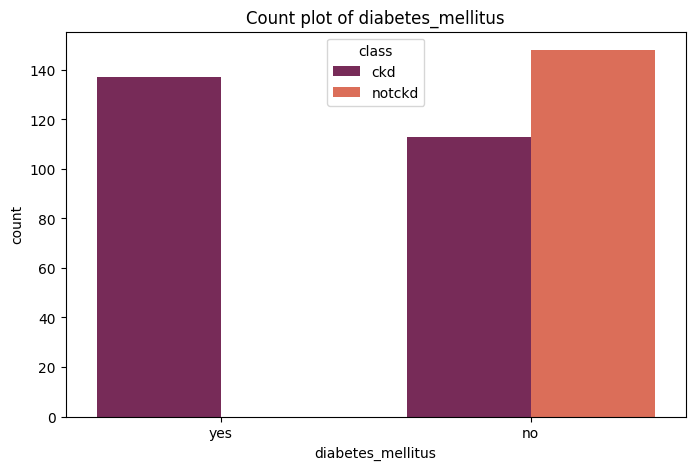

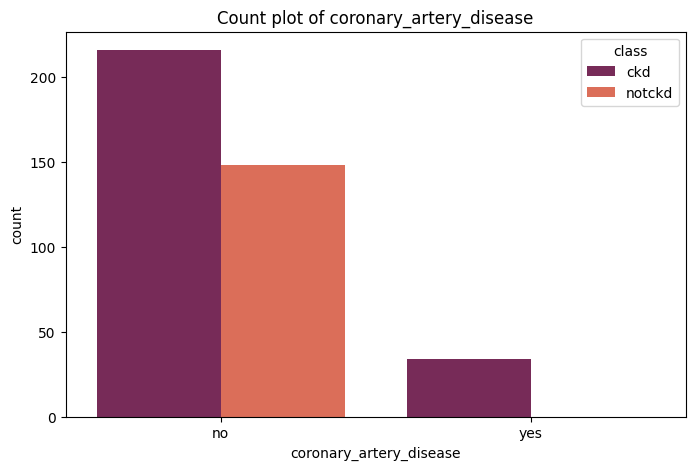

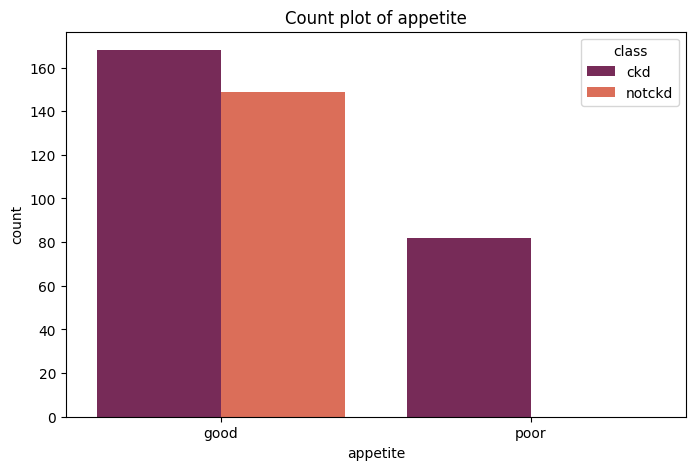

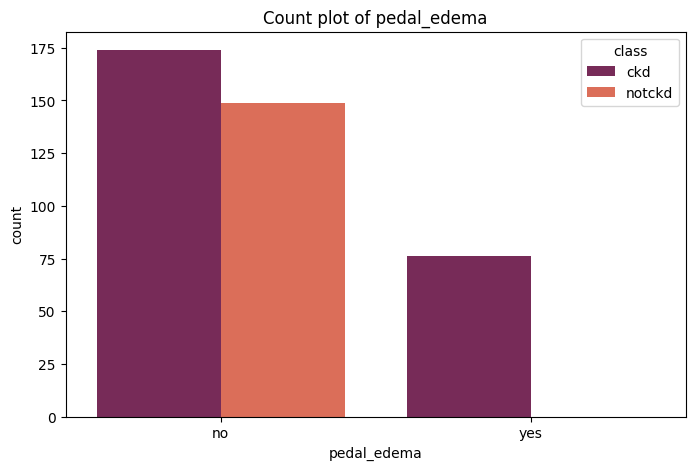

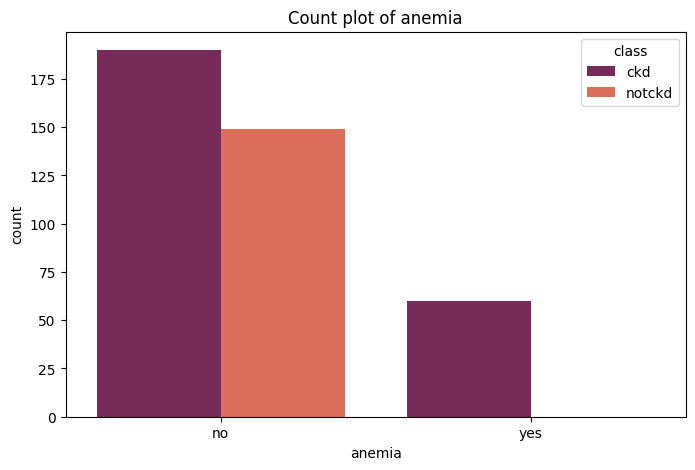

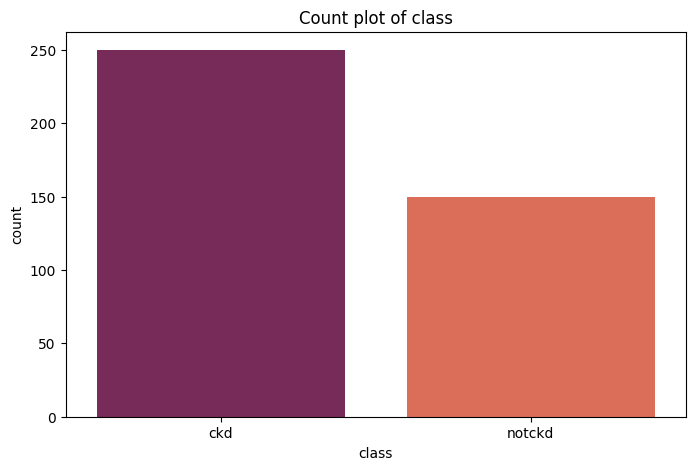

In [18]:
for col in cat_cols:
    plt.figure(figsize=(8,5))
    plt.title(f'Count plot of {col}')
    sns.countplot(x=col,hue='class', data= df,palette='rocket')
    plt.xlabel(col)
    plt.show()

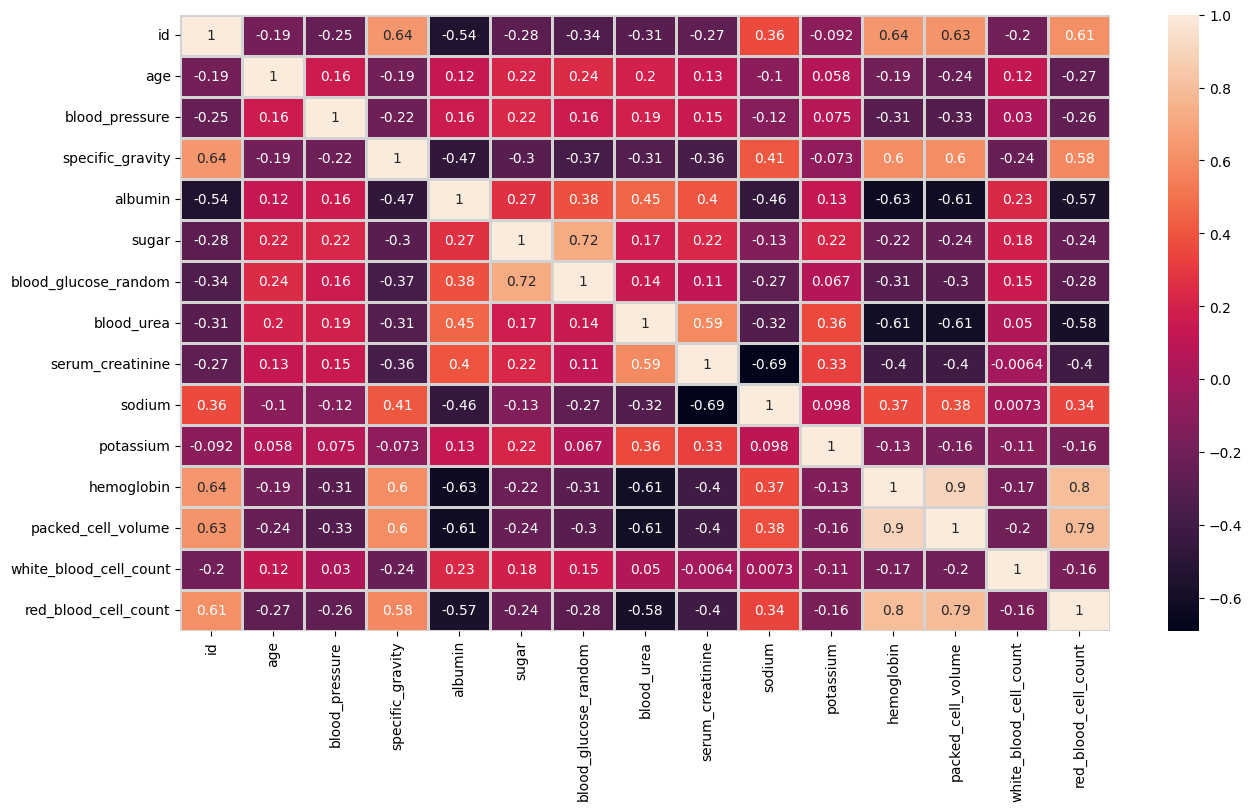

In [19]:
plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

# Preprocessing

In [20]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumps              4
bacteria                     4
diabetes_mellitus            2
hypertension                 2
coronary_artery_disease      2
appetite                     1
anemia                       1
pedal_edema                  1
id                           0
class                        0
dtype: int64

In [21]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum()) # random sampling
    random_sample.index = df[df[feature].isnull()].index # setting the index to match the missing values
    df.loc[df[feature].isnull(), feature] = random_sample # imputing the missing values

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [22]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [23]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [24]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [25]:
for col in cat_cols:
    print (f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anemia has 2 categories

class has 2 categories



In [26]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in cat_cols:
    df[col]=l.fit_transform(df[col])

In [27]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,5.8,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [28]:
#split data in X and Y
x = df.drop(['class', 'id'], axis=1)  # feature variables
y = df['class']  # target variable

In [29]:
x

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,123.0,...,11.3,38.0,6000.0,5.2,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,5.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               4

# Splitting data

In [31]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [32]:
# Modelling

## Logistic Regression

In [33]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,f1_score
# Create a Logistic Regression model
log_reg = LogisticRegression()

# Measure start time
start_time = time.time()

# Train the model
log_reg.fit(X_train, y_train)

# Measure end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Model training time: {training_time:.4f} seconds")

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
lg_accuracy = log_reg.score(X_test, y_test)
lg_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"The accuracy of logistic regression:{lg_accuracy}\n")
print(f"Classification Report :- \n {classification_report(y_test, log_reg.predict(X_test))}")

Model training time: 0.0386 seconds
The accuracy of logistic regression:0.8916666666666667

Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        72
           1       0.87      0.85      0.86        48

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



## Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score

# Create a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
# dt.fit(X_train, y_train)
# Measure start time
start_time = time.time()

# Train the model
dt.fit(X_train, y_train)

# Measure end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Model training time: {training_time:.4f} seconds")

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
dt_accuracy = dt.score(X_test, y_test)
dt_f1 = f1_score(y_test, y_pred, average='weighted')
print("Decision Tree Accuracy:", dt_accuracy)
print(f"Classification Report :- \n {classification_report(y_test, dt.predict(X_test))}")

Model training time: 0.0041 seconds
Decision Tree Accuracy: 0.9583333333333334
Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.90      0.95        48

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
# rf.fit(X_train, y_train)
# Measure start time
start_time = time.time()

# Train the model
rf.fit(X_train, y_train)

# Measure end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Model training time: {training_time:.4f} seconds")

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
rf_accuracy = rf.score(X_test, y_test)
rf_f1 = f1_score(y_test, y_pred, average='weighted')
print("Random Forest Accuracy:", rf_accuracy)
print(f"Classification Report :- \n {classification_report(y_test, rf.predict(X_test))}")

Model training time: 0.2594 seconds
Random Forest Accuracy: 0.9583333333333334
Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.90      0.95        48

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



## SVM

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score

# Create an SVM model
svm = SVC(kernel='linear', C=1, probability=True, random_state=42)

# Train the model
# svm.fit(X_train, y_train)
# Measure start time
start_time = time.time()

# Train the model
svm.fit(X_train, y_train)

# Measure end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Model training time: {training_time:.4f} seconds")

# Make predictions
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]

# Evaluate the model
SVM_accuracy = svm.score(X_test, y_test)
SVM_f1 = f1_score(y_test, y_pred, average='weighted')
print("SVM Accuracy:", SVM_accuracy)
print(f"Classification Report :- \n {classification_report(y_test, svm.predict(X_test))}")

Model training time: 81.8813 seconds
SVM Accuracy: 0.9166666666666666
Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        72
           1       0.88      0.92      0.90        48

    accuracy                           0.92       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score

# Create a KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
# knn_clf.fit(X_train, y_train)
# Measure start time
start_time = time.time()

# Train the model
knn_clf.fit(X_train, y_train)

# Measure end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Model training time: {training_time:.4f} seconds")

# Make predictions
y_pred = knn_clf.predict(X_test)

# Evaluate the model
knn_accuracy = knn_clf.score(X_test, y_test)
knn_f1 = f1_score(y_test, y_pred, average='weighted')
print("KNN Accuracy:", knn_accuracy)
print(f"Classification Report :- \n {classification_report(y_test, knn_clf.predict(X_test))}")

Model training time: 0.0046 seconds
KNN Accuracy: 0.7
Classification Report :- 
               precision    recall  f1-score   support

           0       0.78      0.69      0.74        72
           1       0.61      0.71      0.65        48

    accuracy                           0.70       120
   macro avg       0.69      0.70      0.69       120
weighted avg       0.71      0.70      0.70       120



## XG Boost

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score

# Create an XGBoost model
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Train the model
# xgb.fit(X_train, y_train)
# Measure start time
start_time = time.time()

# Train the model
xgb.fit(X_train, y_train)

# Measure end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Model training time: {training_time:.4f} seconds")

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
XGB_accuracy = xgb.score(X_test, y_test)
XGB_f1 = f1_score(y_test, y_pred, average='weighted')
print("XGBoost Accuracy:", XGB_accuracy)
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


Model training time: 0.3776 seconds
XGBoost Accuracy: 0.975
Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



# Model Comparison

In [40]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Logistic Regression','SVM','XG Boost Classifier'],
    'Score' : [knn_accuracy,dt_accuracy, rf_accuracy,lg_accuracy,SVM_accuracy,XGB_accuracy],
    'F1 Score' : [knn_f1, dt_f1, rf_f1, lg_f1, SVM_f1, XGB_f1]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score,F1 Score
5,XG Boost Classifier,0.975000,0.974852
1,Decision Tree Classifier,0.958333,0.957888
2,Random Forest Classifier,0.958333,0.957888
4,SVM,0.916667,0.916930
3,Logistic Regression,0.891667,0.891470
0,KNN,0.700000,0.702715


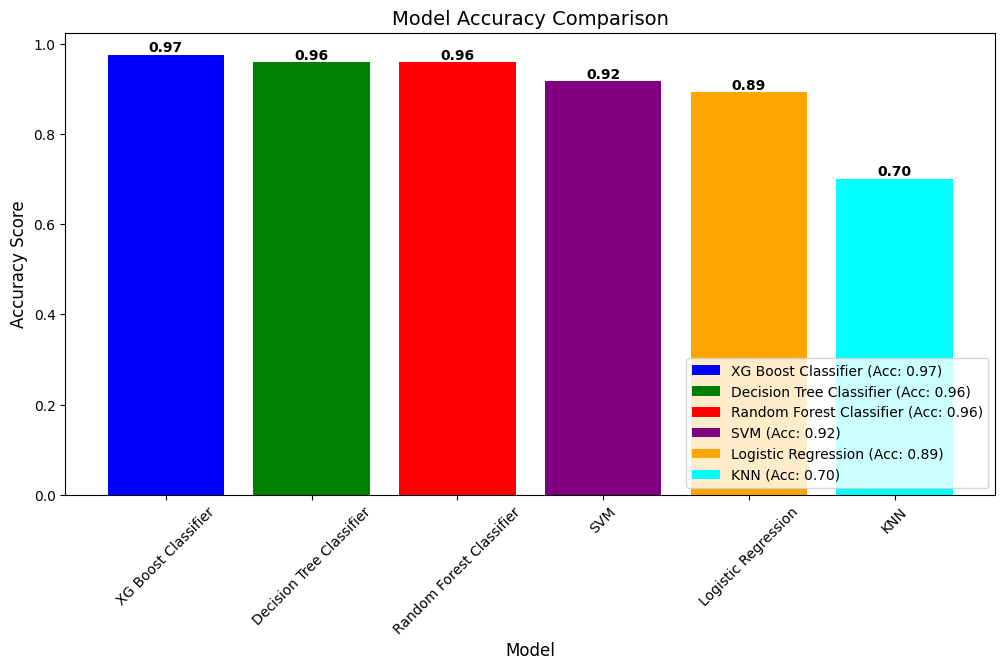

In [41]:
# Compare models
models = pd.DataFrame({
    'Model' : ['KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'Logistic Regression', 'SVM', 'XG Boost Classifier'],
    'Accuracy' : [knn_accuracy, dt_accuracy, rf_accuracy, lg_accuracy, SVM_accuracy, XGB_accuracy],
    'F1 Score' : [knn_f1, dt_f1, rf_f1, lg_f1, SVM_f1, XGB_f1]
})

models = models.sort_values(by='Accuracy', ascending=False)

# Plot Accuracy bar chart
plt.figure(figsize=(12,6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
bars = plt.bar(models['Model'], models['Accuracy'], color=colors)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Add value labels above bars
for bar, acc in zip(bars, models['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{acc:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add legend
legend_labels = [f"{m} (Acc: {a:.2f})" for m, a in zip(models['Model'], models['Accuracy'])]
plt.legend(bars, legend_labels, loc="lower right", fontsize=10)

plt.show()


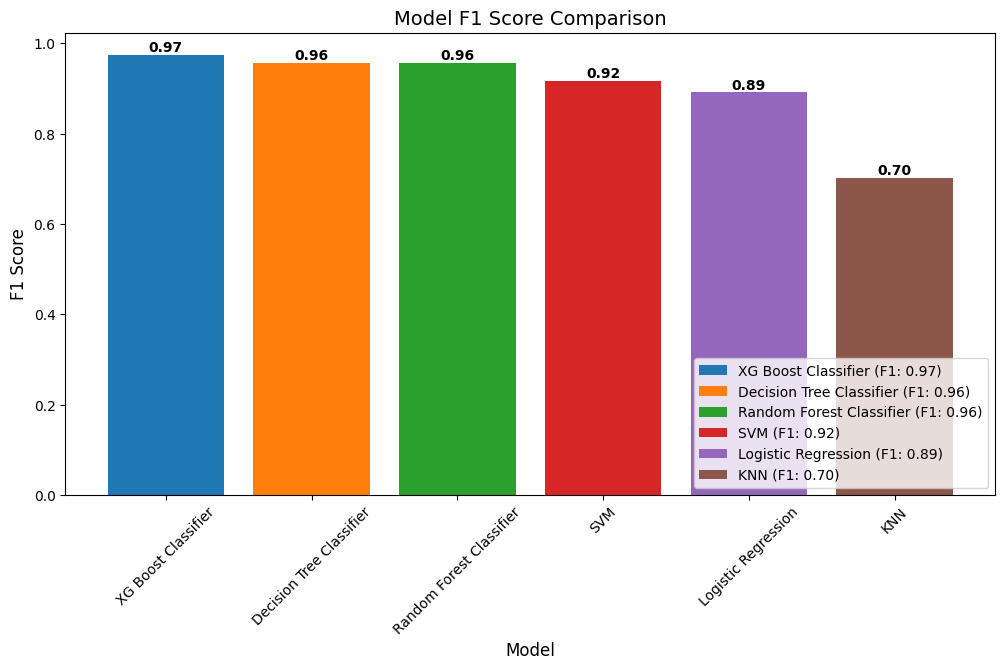

In [42]:
# Plot F1 Score bar chart
plt.figure(figsize=(12,6))
# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
bars = plt.bar(models['Model'], models['F1 Score'], color=colors)
plt.xlabel("Model", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.title("Model F1 Score Comparison", fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Add value labels above bars
for bar, f1 in zip(bars, models['F1 Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{f1:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add legend
legend_labels = [f"{m} (F1: {f:.2f})" for m, f in zip(models['Model'], models['F1 Score'])]
plt.legend(bars, legend_labels, loc="lower right", fontsize=10)

plt.show()


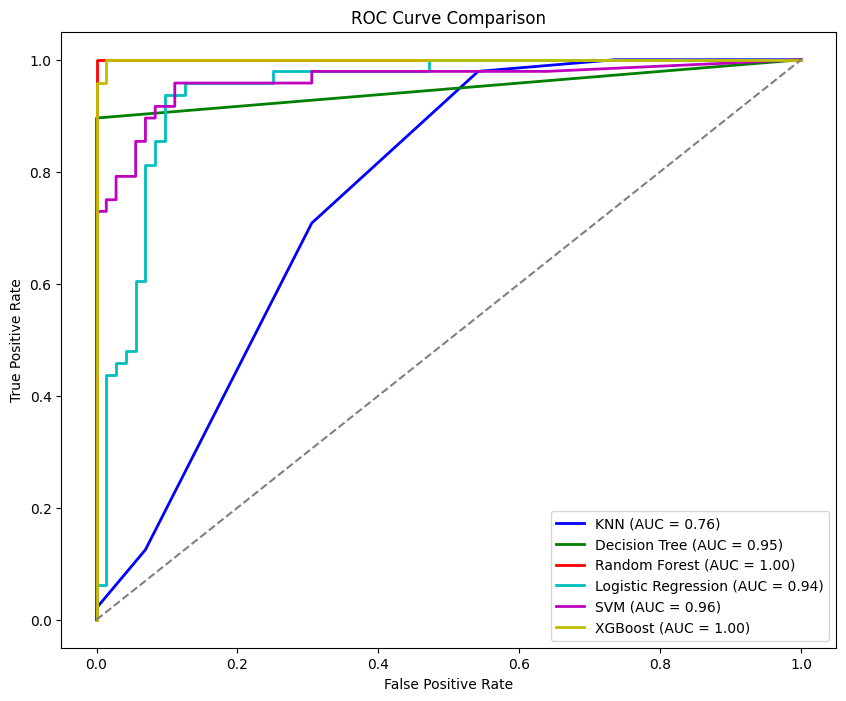

In [43]:
from sklearn.metrics import roc_curve, auc

# Compute ROC Curves for all models
plt.figure(figsize=(10, 8))

models_dict = {
    "KNN": knn_clf,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Logistic Regression": log_reg,
    "SVM": svm,
    "XGBoost": xgb
}

colors = ['b', 'g', 'r', 'c', 'm', 'y']

for (name, model), color in zip(models_dict.items(), colors):
    if hasattr(model, "predict_proba"):  # For models that support probability prediction
        y_prob = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVM without probability, use decision function
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


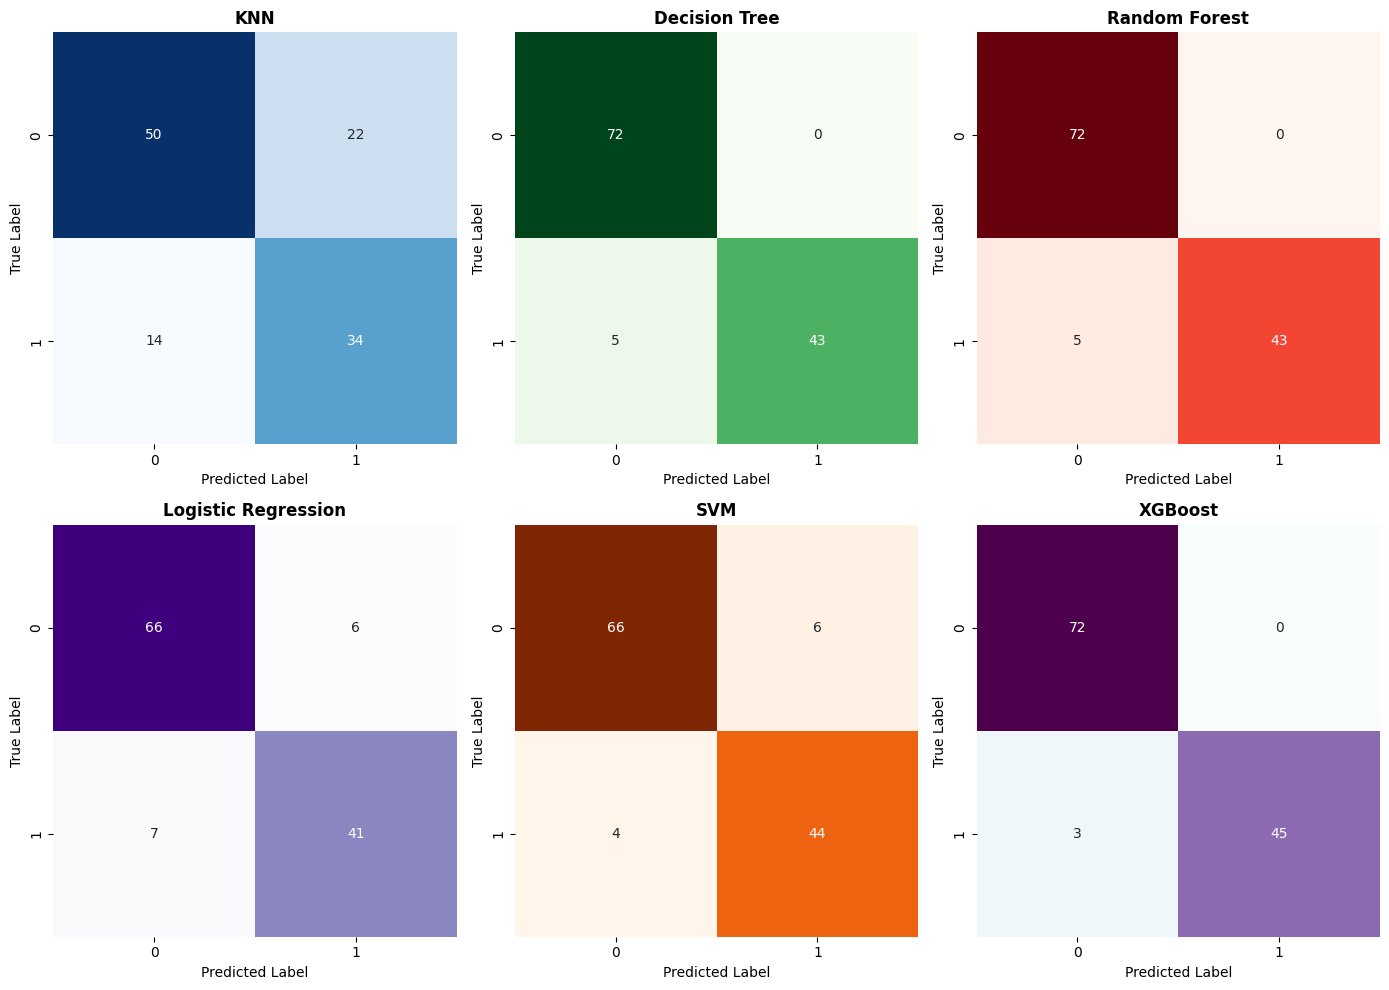

In [44]:
from sklearn.metrics import confusion_matrix

# Define figure size and layout
fig, axes = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns for 6 models
axes = axes.flatten()  # Flatten to easily iterate

models_dict = {
    "KNN": knn_clf,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Logistic Regression": log_reg,
    "SVM": svm,
    "XGBoost": xgb
}

# Different colormaps for each model
color_maps = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges', 'BuPu']

for ax, (name, model), cmap in zip(axes, models_dict.items(), color_maps):
    y_pred = model.predict(X_test)  # Predict class labels
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix with heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False, ax=ax)
    ax.set_title(name, fontsize=12, fontweight='bold')
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [45]:
# Save as CSV
models.to_csv("models.csv", index=False)

## Save all models in .pkl file

In [46]:
import pickle

pickle.dump(log_reg, open("log_reg.pkl", "wb"))
pickle.dump(dt, open("dt.pkl", "wb"))
pickle.dump(rf, open("rf.pkl", "wb"))
pickle.dump(svm, open("svm.pkl", "wb"))
pickle.dump(knn_clf, open("knn.pkl", "wb"))
pickle.dump(xgb, open("xgb.pkl", "wb"))
